Table of context:
- [China](#china)
- [USA](#usa)
- [Japan](#japan)
- [Switzerland](#swiss)


In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import operator
import seaborn as sns
import ipynb 
import statsmodels
import statsmodels.tsa.seasonal
import warnings

from importlib import reload 
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
# import tickers
import tickers
reload(tickers)
from tickers import japan_tickers, china_tickers, us_tickers, ticker_id

In [4]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 12, 1)

In [5]:
country_names = ['China', 'USA', 'Japan']

In [6]:
# take the stock data from yahoo for the countries

datasets_chn = data_from_yahoo(china_tickers, ticker_id, start, end, 'china', read=True)
datasets_us = data_from_yahoo(us_tickers, ticker_id, start, end, 'us', read=True)
datasets_jpn = data_from_yahoo(us_tickers, ticker_id, start, end, 'us', read=True)

# China  <a class="anchor" id="china"></a>

In [115]:
adj_close = {'China':datasets_chn['adj_close'], 'USA':datasets_us['adj_close'], 'Japan':datasets_jpn['adj_close']}
openn = {'China':datasets_chn['open'], 'USA':datasets_us['open'], 'Japan':datasets_jpn['open']}
close = {'China':datasets_chn['close'], 'USA':datasets_us['close'], 'Japan':datasets_jpn['close']}

In [8]:
index = adj_close['China']['Date'] # take the index from a random datasets (same index for all)

In [9]:
adj_close = fill_nan (adj_close, index, 'prova')


prova
 
China: 

Totally, in the dataset there are 492 NaNs values
After the filling thought the mean, in the dataset there are 0 NaNs values
 
USA: 

Totally, in the dataset there are 0 NaNs values
 
Japan: 

Totally, in the dataset there are 0 NaNs values


In [10]:
### Mean open and close price
'''mean_stock = pd.DataFrame()

for ticker in columns:
    if ticker!='Date':
        meann = (datasets['open'].drop('Date', axis=1)[ticker]  + datasets['close'].drop('Date', axis=1)[ticker] )/2
        mean_stock[ticker] = meann
        
mean_stock['Date'] = index
mean_stock = mean_stock.set_index('Date')    
datasets['mean_stock'] = mean_stock
mean_stock.head()'''

"mean_stock = pd.DataFrame()\n\nfor ticker in columns:\n    if ticker!='Date':\n        meann = (datasets['open'].drop('Date', axis=1)[ticker]  + datasets['close'].drop('Date', axis=1)[ticker] )/2\n        mean_stock[ticker] = meann\n        \nmean_stock['Date'] = index\nmean_stock = mean_stock.set_index('Date')    \ndatasets['mean_stock'] = mean_stock\nmean_stock.head()"

## Correlation Matrix adj prices

In [11]:
print(f"Corr Matrix Adj Prices first 50 companies China")
corr = adj_close['China'].corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 50 companies China


,TCEHY,BABA,600519.SS,1398.HK,PNGAY,PDD,CICHY,3968.HK,ACGBY,JD,LFC,BACHF,PTR,000333.SZ,XIACF,603288.SS,600276.SS,601888.SS,002594.SZ,300760.SZ,002415.SZ,NIO,SNP,NTES,BIDU,600900.SS,002352.SZ,601166.SS,002475.SZ,000651.SZ,000001.SZ,002304.SZ,002714.SZ,2359.HK,600030.SS,601601.SS,CSUAY,600031.SS,WXXWY,600309.SS,2202.HK,601633.SS,300015.SZ,600887.SS,BKFCF,AS7.F,6862.HK,300059.SZ
TCEHY,1.00,0.90,0.95,-0.60,0.26,0.91,-0.27,0.69,-0.44,0.95,0.41,-0.36,-0.40,0.92,0.87,0.88,0.30,0.92,0.85,0.91,0.78,0.84,-0.49,0.91,0.57,0.89,0.92,0.32,0.88,0.20,0.54,0.92,-0.66,0.97,0.85,0.33,0.51,0.88,0.84,0.90,-0.22,0.83,0.83,0.89,-0.58,0.80,0.79,0.89
BABA,0.90,1.00,0.86,-0.62,0.36,0.71,-0.43,0.62,-0.57,0.90,0.57,-0.33,-0.27,0.85,0.90,0.90,0.26,0.89,0.79,0.81,0.77,0.76,-0.40,0.83,0.64,0.86,0.93,0.39,0.86,0.16,0.63,0.86,-0.69,0.87,0.88,0.48,0.57,0.83,0.76,0.91,-0.15,0.84,0.77,0.96,-0.46,0.74,0.88,0.82
600519.SS,0.95,0.86,1.00,-0.70,0.12,0.89,-0.36,0.56,-0.52,0.94,0.33,-0.47,-0.51,0.86,0.83,0.90,0.31,0.95,0.74,0.92,0.65,0.74,-0.58,0.96,0.40,0.87,0.91,0.16,0.87,0.04,0.40,0.83,-0.60,0.93,0.88,0.20,0.40,0.85,0.78,0.84,-0.35,0.75,0.72,0.86,-0.63,0.70,0.79,0.90
1398.HK,-0.60,-0.62,-0.70,1.00,0.37,-0.51,0.86,-0.07,0.90,-0.70,0.14,0.78,0.76,-0.51,-0.62,-0.73,-0.14,-0.69,-0.51,-0.77,-0.29,-0.47,0.81,-0.64,0.06,-0.57,-0.77,0.29,-0.65,0.46,-0.03,-0.41,0.34,-0.62,-0.55,0.24,0.00,-0.65,-0.56,-0.55,0.71,-0.56,-0.47,-0.63,0.69,-0.32,-0.73,-0.58
PNGAY,0.26,0.36,0.12,0.37,1.00,0.22,0.41,0.67,0.28,0.18,0.87,0.57,0.67,0.38,0.35,0.12,0.00,0.21,0.30,-0.08,0.57,0.35,0.57,0.20,0.86,0.34,0.12,0.82,0.23,0.82,0.71,0.47,-0.45,0.24,0.36,0.91,0.67,0.19,0.25,0.42,0.76,0.29,0.28,0.32,0.37,0.53,0.20,0.23
PDD,0.91,0.71,0.89,-0.51,0.22,1.00,-0.13,0.74,-0.29,0.91,0.24,-0.31,-0.39,0.91,0.81,0.78,0.12,0.80,0.82,0.80,0.71,0.86,-0.41,0.85,0.48,0.82,0.79,0.33,0.70,0.30,0.51,0.87,-0.63,0.89,0.71,0.25,0.49,0.85,0.86,0.83,-0.17,0.77,0.79,0.74,-0.60,0.84,0.70,0.78
CICHY,-0.27,-0.43,-0.36,0.86,0.41,-0.13,1.00,0.16,0.90,-0.40,0.19,0.70,0.56,-0.23,-0.39,-0.50,-0.04,-0.40,-0.26,-0.45,-0.10,-0.20,0.62,-0.32,0.15,-0.31,-0.52,0.33,-0.40,0.53,0.07,-0.13,0.22,-0.29,-0.28,0.23,0.14,-0.38,-0.30,-0.31,0.64,-0.36,-0.24,-0.43,0.47,-0.08,-0.57,-0.26
3968.HK,0.69,0.62,0.56,-0.07,0.67,0.74,0.16,1.00,0.02,0.68,0.56,0.14,0.09,0.84,0.76,0.56,-0.05,0.52,0.83,0.45,0.87,0.88,0.09,0.50,0.76,0.71,0.57,0.82,0.50,0.73,0.90,0.88,-0.59,0.66,0.59,0.72,0.77,0.73,0.78,0.82,0.41,0.80,0.80,0.64,-0.25,0.91,0.63,0.57
ACGBY,-0.44,-0.57,-0.52,0.90,0.28,-0.29,0.90,0.02,1.00,-0.55,0.00,0.67,0.59,-0.37,-0.55,-0.65,-0.12,-0.61,-0.38,-0.59,-0.27,-0.34,0.67,-0.50,0.01,-0.49,-0.67,0.25,-0.55,0.48,-0.02,-0.30,0.32,-0.48,-0.52,0.14,0.03,-0.47,-0.42,-0.48,0.56,-0.48,-0.32,-0.60,0.39,-0.16,-0.65,-0.51
JD,0.95,0.90,0.94,-0.70,0.18,0.91,-0.40,0.68,-0.55,1.00,0.30,-0.45,-0.49,0.93,0.94,0.93,0.15,0.89,0.87,0.90,0.74,0.87,-0.54,0.89,0.50,0.90,0.95,0.29,0.82,0.14,0.56,0.89,-0.69,0.93,0.81,0.28,0.50,0.92,0.88,0.91,-0.27,0.88,0.84,0.89,-0.67,0.82,0.90,0.83


In [12]:
# name first 5
name_important_stocks_china = extract_max(adj_close['China'], 5, Names=True)

# dataset first 5
adj_close_imp_china = adj_close['China'][name_important_stocks_china]
adj_close_imp_china['Data'] = index
adj_close_imp_china = adj_close_imp_china.set_index('Data')
adj_close_imp_china.head()

,600519.SS,300760.SZ,BABA,601888.SS,603288.SS
Data,,,,,
2020-01-02,1116.952637,179.320694,219.770004,89.709709,106.899536
2020-01-03,1066.106689,177.003738,217.000000,90.636192,104.335930
2020-01-06,1065.543213,175.631454,216.639999,89.659897,102.564171
2020-01-07,1081.892212,179.688614,217.630005,90.566460,104.919914
2020-01-08,1075.576050,179.141693,218.000000,90.954987,105.088181


In [13]:
# first 5 companies
print(f"Corr Matrix Adj Prices first 5 companies China")
corr = adj_close_imp_china.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 5 companies China


,600519.SS,300760.SZ,BABA,601888.SS,603288.SS
600519.SS,1.00,0.92,0.86,0.95,0.90
300760.SZ,0.92,1.00,0.81,0.87,0.86
BABA,0.86,0.81,1.00,0.89,0.90
601888.SS,0.95,0.87,0.89,1.00,0.90
603288.SS,0.90,0.86,0.90,0.90,1.00


### Plot time series adjusted closing price

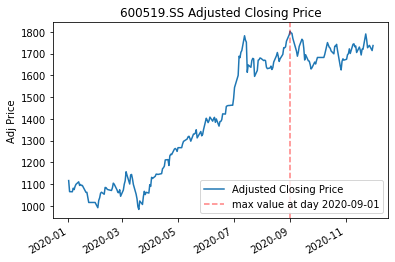

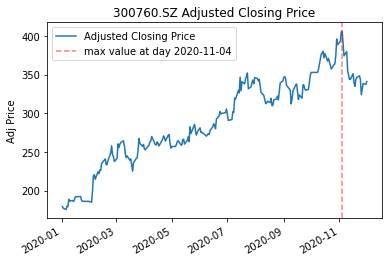

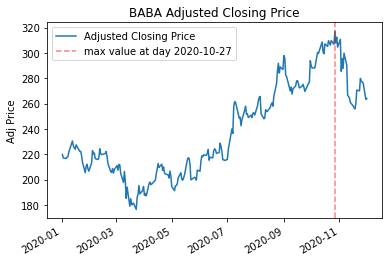

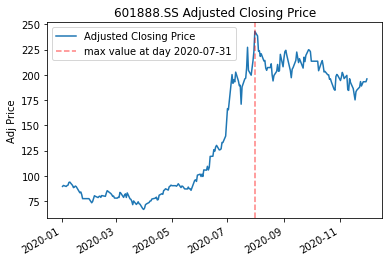

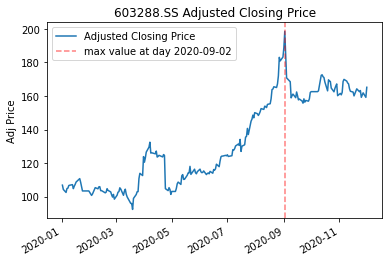

In [15]:
plot_price(index, adj_close_imp_china, name_important_stocks_china, 'Adjusted Closing Price', 'Adj Price')

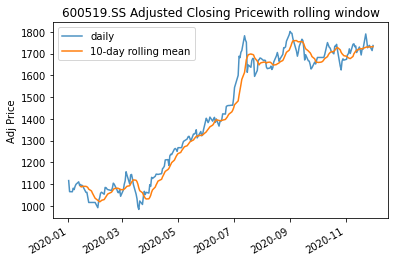

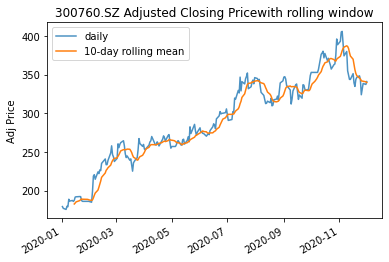

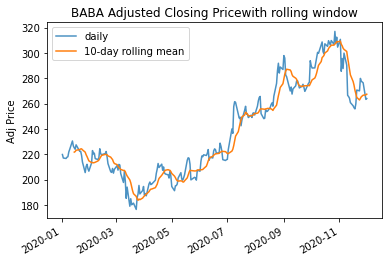

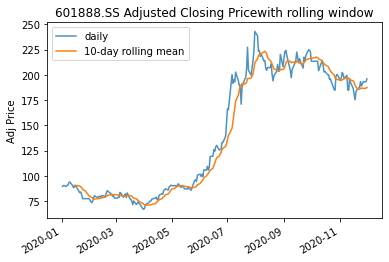

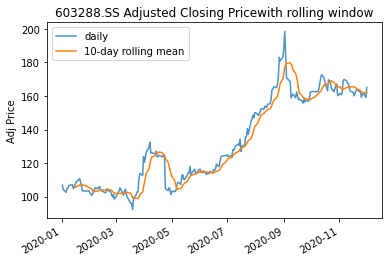

In [17]:
# plot with rolling of 10 days
plot_price_rolling(index, adj_close_imp_china, 10, name_important_stocks_china, 'Adjusted Closing Price', 'Adj Price')

## Variance adjusted prices

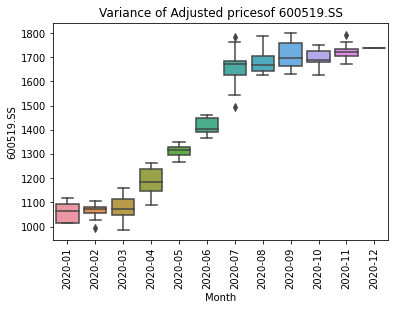

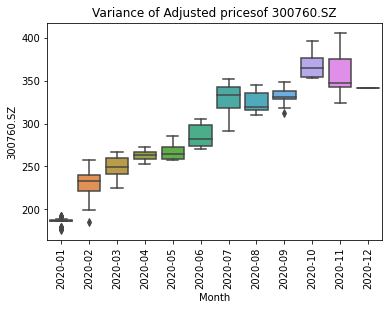

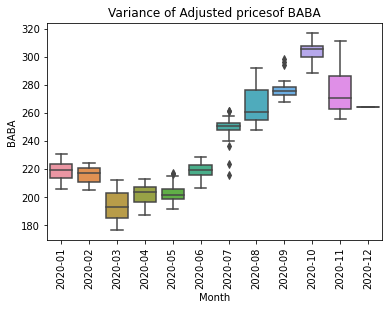

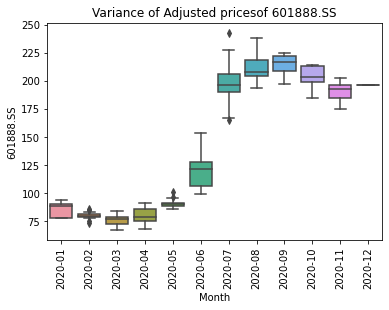

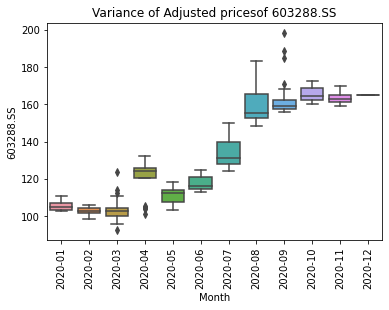

In [110]:
plot_variance(name_important_stocks_china, adj_close_imp_china, 'Adjusted prices')

## Return:

$R_t = \frac{S_t-S_{t-1}}{S_{t-1}}$

In [43]:
df_returns = returns(name_important_stocks_china, adj_close_imp_china, index)
df_returns.head()

,600519.SS,300760.SZ,BABA,601888.SS,603288.SS
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-4.552203,-1.292074,-1.260411,1.032757,-2.398145
2020-01-06,-0.052854,-0.775285,-0.165899,-1.077159,-1.698129
2020-01-07,1.534335,2.310041,0.456982,1.011113,2.296848
2020-01-08,-0.583807,-0.304371,0.170011,0.428996,0.160376


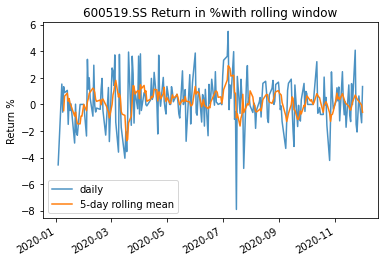

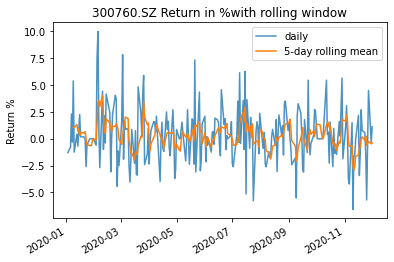

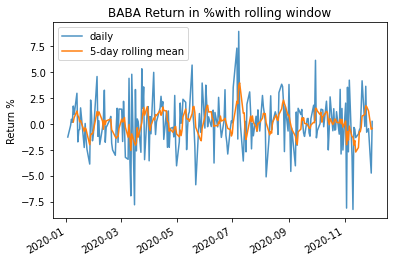

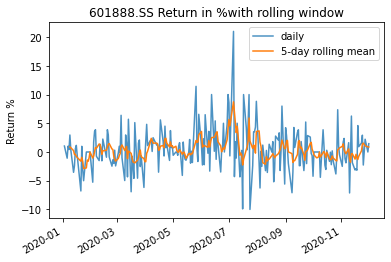

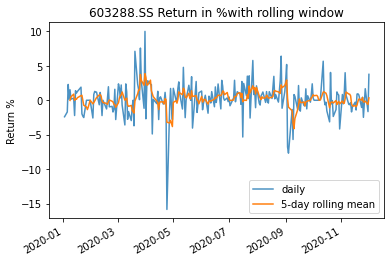

In [44]:
plot_price_rolling(index, df_returns, 5, name_important_stocks_china, 'Return in %', 'Return %')

### Variance Returns

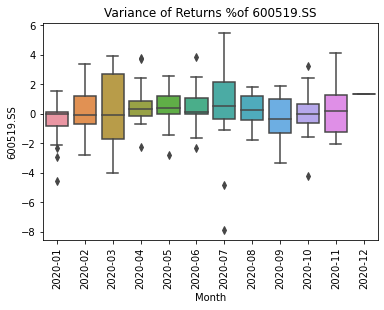

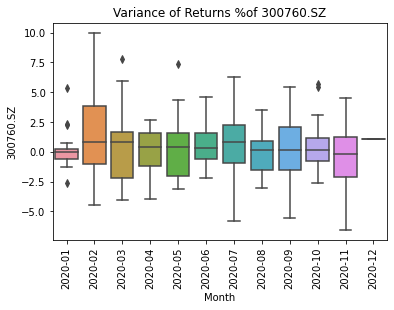

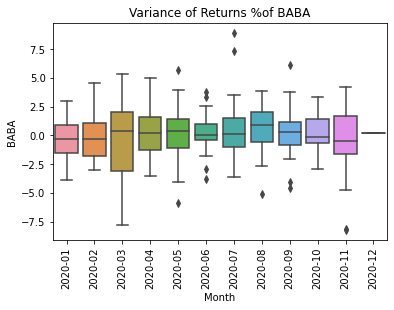

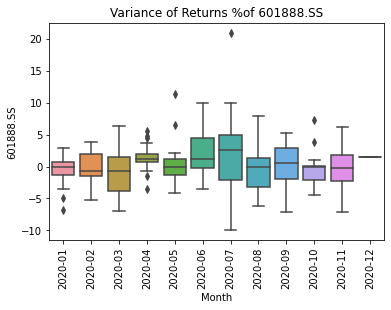

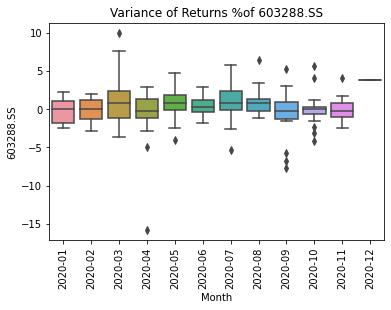

In [112]:
plot_variance(name_important_stocks_china, df_returns, 'Returns %')

In [121]:
import stock_analysis_functions
reload(stock_analysis_functions)
from stock_analysis_functions import data_from_yahoo, fill_nan, extract_max, plot_price, plot_price_rolling
from stock_analysis_functions import returns, get_sp500_stocks_data, create_SP500_index, create_merge_SP500_index
from stock_analysis_functions import plot_variance,plot_rolling_timeseries

### Plot difference difference open closing

In order to understand how much they loose each day

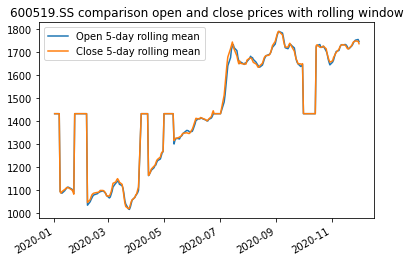

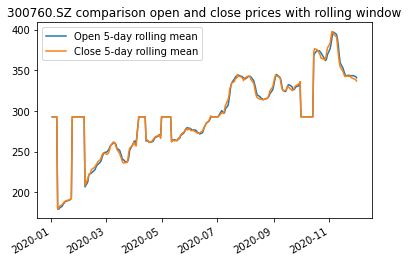

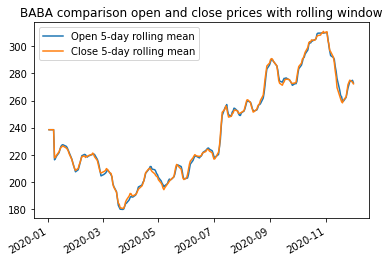

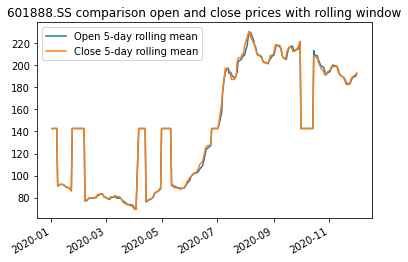

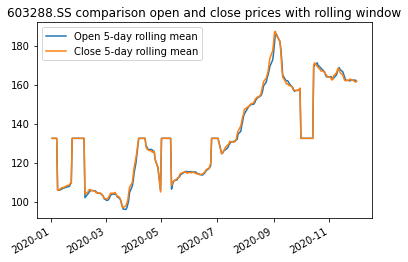

In [123]:
plot_rolling_timeseries(index, name_important_stocks_china, openn['China'], close['China'], 5, 'comparison open and close prices')

## SP500

In [20]:
#df_sp500_stocks = get_sp500_stocks_data(index, start, end)

In [21]:
df_sp500_stocks = get_sp500_stocks_data(index, start, end, read=True)

In [22]:
df_sp500_stocks.head()

,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,Adj Close.9,...,Volume.496,Volume.497,Volume.498,Volume.499,Volume.500,Volume.501,Volume.502,Volume.503,Volume.504,Date
0,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84.62352752685547,28.574403762817383,158.65269470214844,72.783935546875,83.89559936523438,83.53189849853516,170.58999633789062,85.51184844970703,207.2430877685547,329.80999755859375,...,13151800,1211000,1380100,492000,1271000,612400,363500,1246900,1128600,NaN
3,85.25837707519531,28.982892990112305,157.90972900390625,74.4446029663086,84.85260772705078,83.59085845947266,168.80999755859375,85.60044860839844,206.8297119140625,334.42999267578125,...,12456400,1556600,1581300,869500,1369900,1052400,387800,1528700,1576700,NaN
4,83.88947296142578,27.548194885253906,157.9196319580078,73.72084045410156,84.04720306396484,82.53959655761719,166.82000732421875,84.5569076538086,206.4852294921875,331.80999755859375,...,17386900,910000,1042600,795100,1145500,963500,305300,1215800,1274000,NaN


In [23]:
# only Adj Close prices, no volume
columns_adj_prices = [col for col in df_sp500_stocks if col.startswith('Adj Close')]
df_sp500_stocks = df_sp500_stocks[columns_adj_prices]

In [24]:
# correct columns names:
df_sp500_stocks = df_sp500_stocks.rename(columns=df_sp500_stocks.iloc[0]) # rename columns first line
df_sp500_stocks = df_sp500_stocks.drop(df_sp500_stocks.index[0]) # dlete first line
df_sp500_stocks = df_sp500_stocks.drop(df_sp500_stocks.index[0]) # delete data row'''
df_sp500_stocks['Date'] = index # we check this was fine !
df_sp500_stocks = df_sp500_stocks[df_sp500_stocks['Date'].isnull()==False]
df_sp500_stocks = df_sp500_stocks.set_index('Date')
#df_sp500_stocks = df_sp500_stocks.drop('Date', axis=1)

df_sp500_stocks.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,84.62352752685547,28.574403762817383,158.65269470214844,72.783935546875,83.89559936523438,83.53189849853516,170.58999633789062,85.51184844970703,207.2430877685547,329.80999755859375,...,96.29391479492188,64.61932373046875,56.05650329589844,34.930084228515625,77.76145935058594,98.8283462524414,148.4962615966797,255.44000244140625,50.02912139892578,131.59608459472656
2020-01-07,85.25837707519531,28.982892990112305,157.90972900390625,74.4446029663086,84.85260772705078,83.59085845947266,168.80999755859375,85.60044860839844,206.8297119140625,334.42999267578125,...,100.11534881591797,65.656494140625,56.3932991027832,34.98693084716797,78.80762481689453,100.24114990234375,148.0200653076172,259.1400146484375,50.530181884765625,133.3759002685547
2020-01-08,83.88947296142578,27.548194885253906,157.9196319580078,73.72084045410156,84.04720306396484,82.53959655761719,166.82000732421875,84.5569076538086,206.4852294921875,331.80999755859375,...,97.81067657470703,65.12865447998047,55.76923751831055,34.53218460083008,79.271484375,99.92719268798828,147.63314819335938,256.04998779296875,49.817134857177734,133.39578247070312
2020-01-09,84.13746643066406,27.219409942626953,155.32431030273438,74.30826568603516,84.71047973632812,83.74805450439453,179.0399932861328,84.99991607666016,205.13690185546875,333.7099914550781,...,95.77192687988281,65.62871551513672,56.076316833496094,34.01112747192383,78.75828552246094,99.86833190917969,146.7799530029297,258.010009765625,49.210079193115234,132.3716583251953
2020-01-10,84.39537811279297,27.11977767944336,153.48182678222656,73.95879364013672,84.22723388671875,83.14872741699219,180.35000610351562,84.5273666381836,200.7079620361328,333.3900146484375,...,97.95840454101562,65.09160614013672,56.37348937988281,34.05849075317383,78.46219635009766,100.04493713378906,146.65097045898438,256.4700012207031,48.91136932373047,132.81907653808594


In [25]:
# values from string to float
for c in df_sp500_stocks.columns:
    try:
        df_sp500_stocks[c] = pd.to_numeric(df_sp500_stocks[c])
    except:
        pass
    
print(df_sp500_stocks.info())

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 2020-01-06 to 2020-12-01
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 909.2+ KB
None


In [26]:
dict_sp500 = {'SP500': df_sp500_stocks} # trasform to dict to use the same fucntion we defined for the stocks
dict_sp500 = fill_nan(dict_sp500, index, 'SP500', False)
df_sp500_stocks = dict_sp500['SP500']


SP500
 
SP500: 

Totally, in the dataset there are 409 NaNs values
After the filling thought the mean, in the dataset there are 358 NaNs values
After the filling of first/last values, in the dataset there are 0 NaNs values


In [27]:
df_sp500_stocks.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,84.623528,28.574404,158.652695,72.783936,83.895599,83.531898,170.589996,85.511848,207.243088,329.809998,...,96.293915,64.619324,56.056503,34.930084,77.761459,98.828346,148.496262,255.440002,50.029121,131.596085
2020-01-07,85.258377,28.982893,157.909729,74.444603,84.852608,83.590858,168.809998,85.600449,206.829712,334.429993,...,100.115349,65.656494,56.393299,34.986931,78.807625,100.241150,148.020065,259.140015,50.530182,133.375900
2020-01-08,83.889473,27.548195,157.919632,73.720840,84.047203,82.539597,166.820007,84.556908,206.485229,331.809998,...,97.810677,65.128654,55.769238,34.532185,79.271484,99.927193,147.633148,256.049988,49.817135,133.395782
2020-01-09,84.137466,27.219410,155.324310,74.308266,84.710480,83.748055,179.039993,84.999916,205.136902,333.709991,...,95.771927,65.628716,56.076317,34.011127,78.758286,99.868332,146.779953,258.010010,49.210079,132.371658
2020-01-10,84.395378,27.119778,153.481827,73.958794,84.227234,83.148727,180.350006,84.527367,200.707962,333.390015,...,97.958405,65.091606,56.373489,34.058491,78.462196,100.044937,146.650970,256.470001,48.911369,132.819077


In [73]:
#  create the SP500 dataframe and merge it to tnhe returns dataframe
df_returns_sp500 = create_merge_SP500_index(df_sp500_stocks, df_returns)
df_returns_sp500.head()

,600519.SS,300760.SZ,BABA,601888.SS,603288.SS,SP500
Date,,,,,,
2020-01-07,1.534335,2.310041,0.456982,1.011113,2.296848,0.549624
2020-01-08,-0.583807,-0.304371,0.170011,0.428996,0.160376,-0.370652
2020-01-09,1.338048,5.389954,1.733944,2.957283,1.525862,0.251415
2020-01-10,0.888743,-1.243019,0.924341,0.361693,0.157713,-0.071727
2020-01-13,1.057971,0.426672,2.971002,-3.540377,0.314929,0.347526


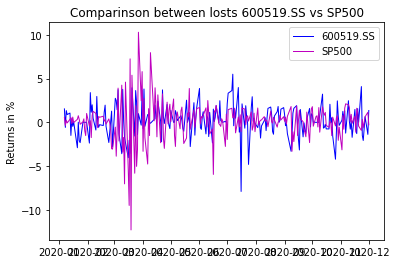

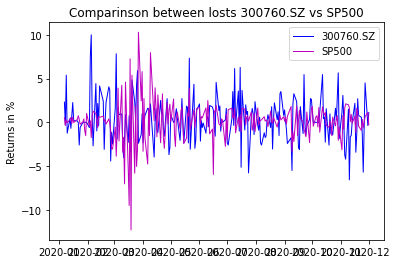

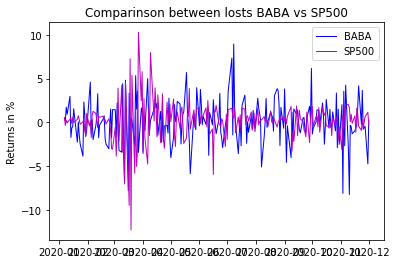

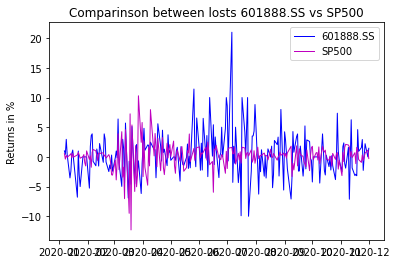

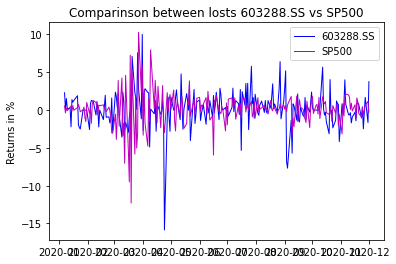

In [61]:
for name in name_important_stocks_china:
    
    y2 = df_returns_sp500[name]
    y1 = df_returns_sp500['SP500']
    
    plt.plot(pd.to_datetime(df_returns_sp500.index), y2, label=name, color='b', linewidth=1)
    plt.plot(pd.to_datetime(df_returns_sp500.index), y1, label='SP500', color='m', linewidth=1)
    #plt.fill_between(index, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
    #plt.fill_between(index, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
    plt.legend()
    title = 'Comparinson between losts ' + name + ' vs SP500'
    plt.title(title)
    plt.ylabel('Returns in %')
    plt.show()

In this way it is really hard to enderstand (no good plot). Therefore, let us work with rolling windows, which lend to much more readable results

### Rolling Windows:

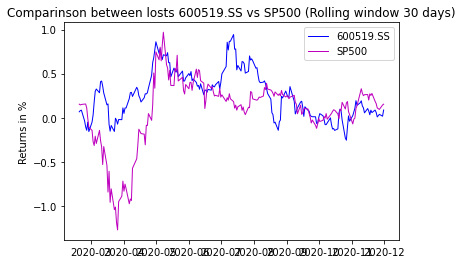

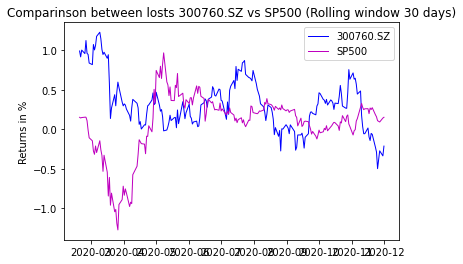

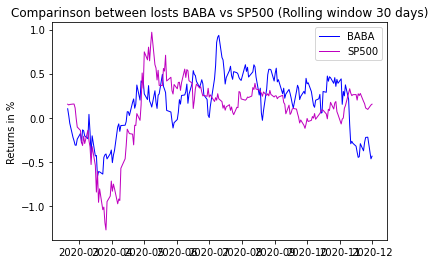

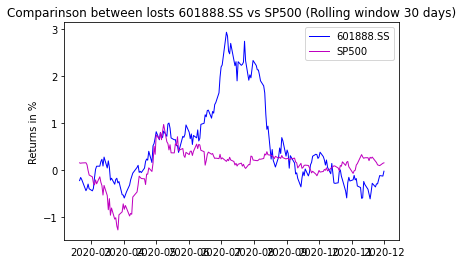

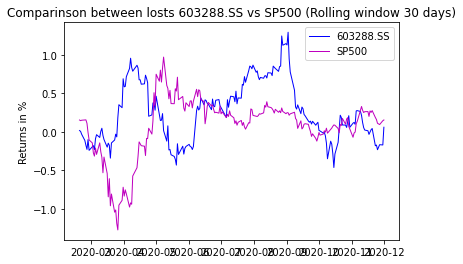

In [62]:
for name in name_important_stocks_china:
    
    y2 = df_returns_sp500[name].rolling(30).mean()
    y1 = df_returns_sp500['SP500'].rolling(30).mean()
    
    plt.plot(pd.to_datetime(df_returns_sp500.index), y2, label=name, color='b', linewidth=1)
    plt.plot(pd.to_datetime(df_returns_sp500.index), y1, label='SP500', color='m', linewidth=1)
    #plt.fill_between(index, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
    #plt.fill_between(index, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
    plt.legend()
    title = 'Comparinson between losts ' + name + ' vs SP500 (Rolling window 30 days)'
    plt.title(title)
    plt.ylabel('Returns in %')
    plt.show()

In [ ]:
for name in name_important_stocks_china:
    
    y2 = df_returns_sp500[name].rolling(30).mean()
    y1 = df_returns_sp500['SP500'].rolling(30).mean()
    
    plt.plot(pd.to_datetime(df_returns_sp500.index), y2, label=name, color='b', linewidth=1)
    plt.plot(pd.to_datetime(df_returns_sp500.index), y1, label='SP500', color='m', linewidth=1)
    #plt.fill_between(index, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
    #plt.fill_between(index, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
    plt.legend()
    title = 'Comparinson between losts ' + name + ' vs SP500 (Rolling window 30 days)'
    plt.title(title)
    plt.ylabel('Returns in %')
    plt.show()

# USA  <a class="anchor" id="usa"></a>

# Japan  <a class="anchor" id="japan"></a>

# Switzerland  <a class="anchor" id="swiss"></a>

## Create portfolios with adjusted closed price
### EW

In [ ]:
df_portfolio = pd.DataFrame(index=date_index[1:])

In [ ]:
adj_close = datasets['adj_close'].set_index('Date')
returns_all = (adj_close - adj_close.shift(1))/adj_close.shift(1) # return calculated as fraction/decimal
returns_all = returns_all.iloc[1:] # ignore first row
returns_all.head(10)

In [ ]:
df_portfolio['EW'] = returns_all.mean(axis=1).values
df_portfolio.head()

### VW
The first 5 have 60% of the value and all the others 40%

In [ ]:
# names two groups
stocks_60_names =  highest_name
stocks_40_names = [ stock for stock in returns_all.columns if stock not in  highest_name]  

# stocks value two groups
stocks_60 = returns_all[stocks_60_names]
stocks_40 = returns_all[stocks_40_names]

# mean each group
stocks_60_mean = stocks_60.mean(axis=1).values
stocks_40_mean = stocks_40.mean(axis=1).values

# weight 60 40:
df_portfolio['VW'] = stocks_60_mean * 0.6 + stocks_40_mean * 0.4

Of course the VW portfolio has higher values

In [ ]:
df_portfolio.head()

In [ ]:
# save:
df_portfolio.to_csv('datasets_stocks/japan_portfolio.csv')